In [ ]:
# import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#styling setup

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/pdb_data_no_dups.csv')

#inspect
print("Shape: ", df.shape)
df.head()

Shape:  (141401, 14)


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [ ]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

,0
crystallizationMethod,45159
crystallizationTempK,44362
phValue,36291
publicationYear,23799
pdbxDetails,22867
densityMatthews,16677
densityPercentSol,16652
resolution,12812
macromoleculeType,3765
classification,2


In [ ]:
df.replace({'?': np.nan, 'None':np.nan, ' ': np.nan, '':np.nan}, inplace=True)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna('Unknown')

df.isnull().sum().sum()

np.int64(0)

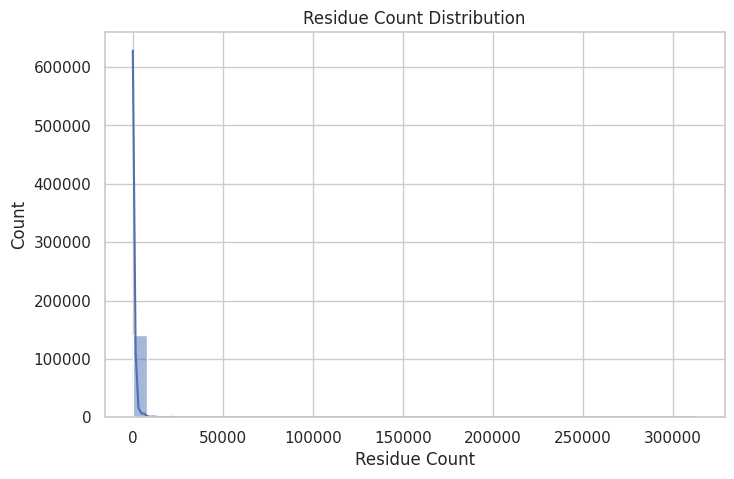

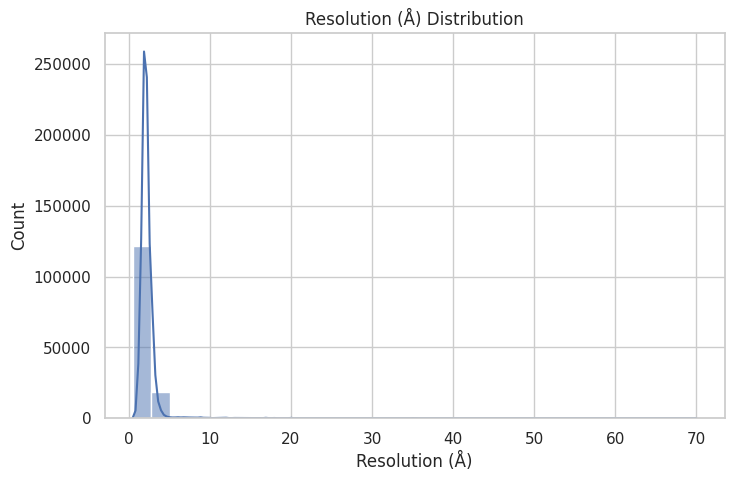

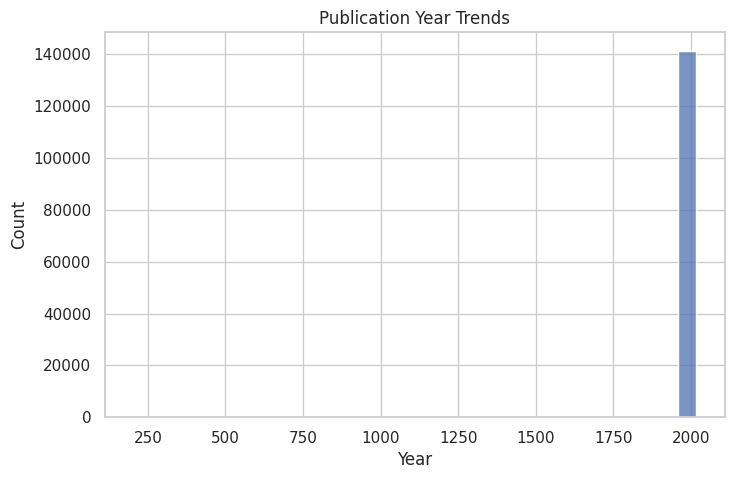

In [ ]:
sns.histplot(df['residueCount'], bins=40, kde=True)
plt.title('Residue Count Distribution')
plt.xlabel('Residue Count')
plt.show()

# Histogram: Resolution
sns.histplot(df['resolution'], bins=30, kde=True)
plt.title('Resolution (Å) Distribution')
plt.xlabel('Resolution (Å)')
plt.show()

# Histogram: Publication Year
sns.histplot(df['publicationYear'], bins=30)
plt.title('Publication Year Trends')
plt.xlabel('Year')
plt.show()

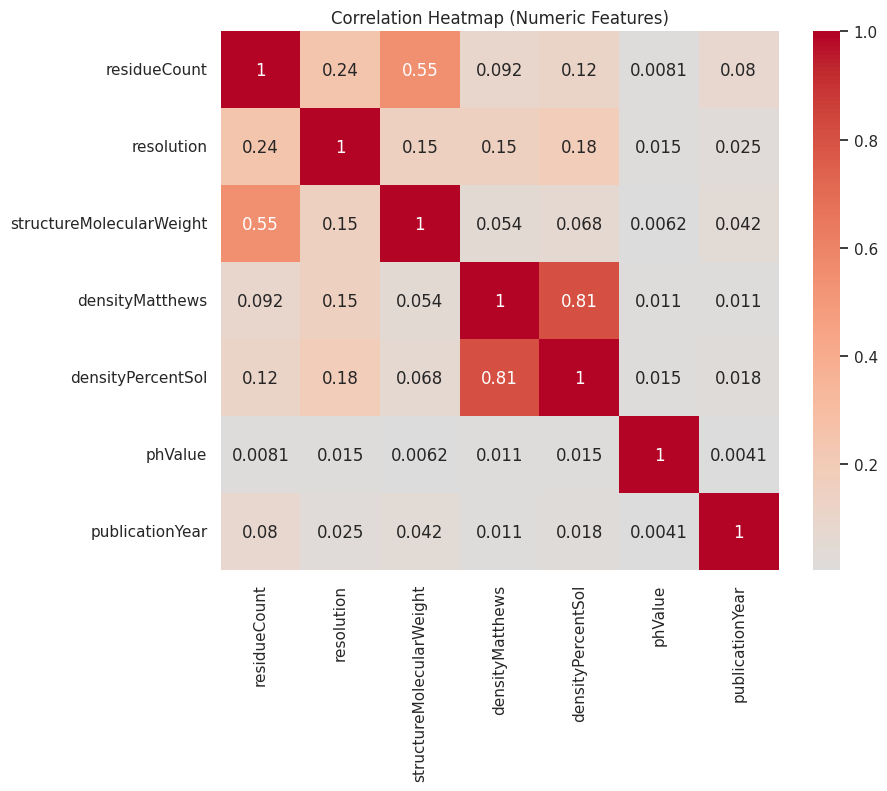

In [ ]:
num_cols = ['residueCount', 'resolution', 'structureMolecularWeight', 'densityMatthews', 'densityPercentSol', 'phValue', 'publicationYear']
num_cols = [c for c in num_cols if c in df.columns]
corr = df[num_cols].corr()

#Plot heatmap

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', center= 0)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()